# Regressione: Esercitazione

Per questa esercitazione dovrai creare il tuo primo modello di regressione lineare. Per farlo utilizzerai il Boston Housing Dataset, che hai già visto nella sezione dedicata al preprocessing dei dati. Puoi scaricare il dataset già pulito [da qui](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/housing_dirty.csv).

Il dataset contiene le seguenti informazioni

1. **CRIM** Tasso di criminalità per capita
2. **ZN** Percentuale di terreni residenziali suddivisi in zone per lotti superiori a 25.000 sq.ft.
3. **INDUS** Percentuale di ettari di attività non al dettaglio per città.
4. **CHAS** Variabile dummy che indica la prossimità al fiume Charles.
5. **NOX** Concentrazione di ossido d'azoto (parti per 10 milioni).
6. **RM** Numero medio di stanze per abitazione
7. **AGE** Percentuale di abitazione occupate costruite dopo il 1940
8. **DIS** Media pesata delle distanze da 5 centri lavorativi di Boston.
9. **RAD** Indice di accessibilità ad autostrade
10. **TAX** Aliquota dell'imposta sulla proprietà a valore pieno in 10.000 USD.
11. **PRATIO** Rapporto studente-insegnante per città.
12. **BLACK** 1000(Bk - 0.63)^2 dove Bk è la percentuale di abitanti di colore per città
13. **LSTAT** Percentuale della popolazione povera
14. **PRICE** Mediana del valore di abitazioni occupate in 1.000 USD.

Il target è la colonna PRICE, cioè vogliamo prevedere il valore delle abitazioni.

Nello specifico, devi risolvere i seguenti punti:
1. Crea la matrice di correlazione. 
2. Addestra e valuta un modello di regressione lineare semplice utilizzano la variabile che sembra maggiormente correlata al target.
3. Addestra e valuta un modello di regressione lineare multipla utilizzando le due variabili che sembrano maggiormente correlate al target.
4. Aggiungi una terza variabile, quindi crea diversi modelli di regressione polinomiale, senza superare il grado 5, prova sia con che senza bias.
5. Addestra e valuta un modello di regressione lineare utilizzando tutte le variabili del dataset.
6. Esegui la normalizzazione dei dati e riaddestra il modello, le performance sono migliorate?
7. Esegui la standardizzazione dei dati e riaddestra il modello, le performance sono migliorate?
8. Utilizza il modello con tutte le features per prevedere il prezzo delle abitazioni che trovi in [questo file CSV]().
9. Salva il risultato in un file excel chiamato "housing_estimate.xlsx", deve contenere due colonne: OWNER=il proprietario dell'abitazione, ESTIMATED PRICE=il valore stimato dal nostro modello.


**Nota**
Se mastichi già l'argomento e il termine "overfitting" non ti è nuovo, non preoccupartene per adesso, ci arriveremo nella prossima sezione.

### Soluzione

In [1]:
import numpy as np
import pandas as pd

In [2]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"
df = pd.read_csv(BASE_URL+"housing.csv", index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###1. Crea la matrice di correlazione. 


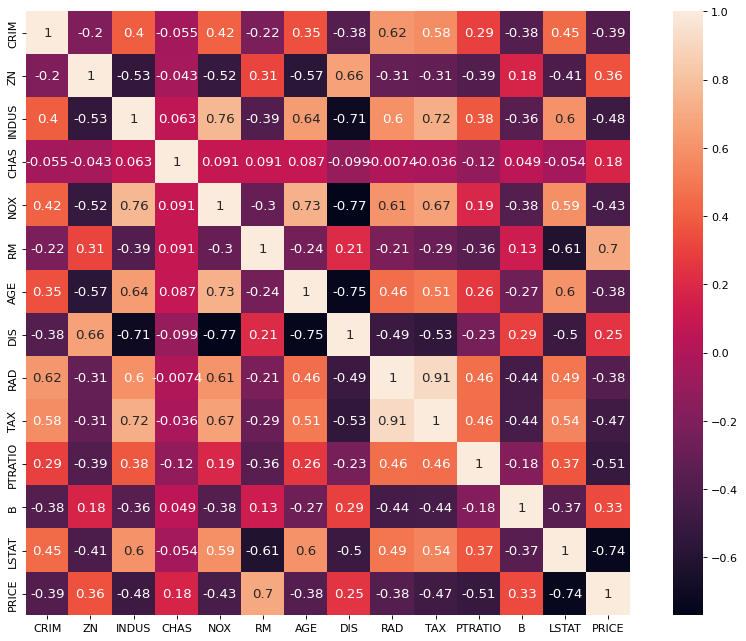

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10), dpi=80)

hm = sns.heatmap(df.corr(),
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,                  #Questo ci mostra i valori degli indici
                 annot_kws={'size':12})       #Impostiamo la dimensione dell'annotazione a 12 per farla entrare dentro il quadrato

plt.show()

### 2. Addestra e valuta un modello di regressione lineare semplice utilizzano la variabile che sembra maggiormente correlata al target.

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, data):
    x, y = data
    y_pred = model.predict(x)
    print(f"RMSE = {np.sqrt(mean_squared_error(y, y_pred))}")
    print(f"R2 = {r2_score(y, y_pred)}")

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
x = df["LSTAT"].values
y = df["PRICE"].values

In [7]:
x.shape

(506,)

In [8]:
x = x.reshape(-1, 1)
x.shape

(506, 1)

In [9]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [10]:
evaluate(lr, (x,y))

RMSE = 6.20346413142642
R2 = 0.5441462975864797


In [11]:
evaluate(lr, (x,y))

RMSE = 6.20346413142642
R2 = 0.5441462975864797


### 4. Addestra e valuta un modello di regressione lineare multipla utilizzando le due variabili che sembrano maggiormente correlate al target.

In [12]:
X = df[["LSTAT","RM"]].values
y = df["PRICE"].values
X.shape

(506, 2)

In [14]:
lr = LinearRegression()
lr.fit(X, y)
evaluate(lr, (X, y))

RMSE = 5.523809263298243
R2 = 0.6385616062603403


### 5. Aggiungi una terza variabile, quindi crea diversi modelli di regressione polinomiale, senza superare il grado 5.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
X = df[["LSTAT","RM", "PTRATIO"]].values
y = df["PRICE"].values
X.shape

(506, 3)

In [17]:
for i in range(2, 6):
    print(f"Polinomio di grado {i} con bias")
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    evaluate(lr, (X_poly, y))
    print("----------")

Polinomio di grado 2 con bias
RMSE = 4.144169801696807
R2 = 0.7965620274818106
----------
Polinomio di grado 3 con bias
RMSE = 3.9939405131856263
R2 = 0.8110442467458951
----------
Polinomio di grado 4 con bias
RMSE = 8.429450544234742
R2 = 0.15830360033810886
----------
Polinomio di grado 5 con bias
RMSE = 3.4951481607344594
R2 = 0.8552934743830292
----------


In [18]:
for i in range(2, 6):
    print(f"Polinomio di grado {i} senza bias")
    poly = PolynomialFeatures(i, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    evaluate(lr, (X_poly, y))
    print("----------")

Polinomio di grado 2 senza bias
RMSE = 4.14416980169681
R2 = 0.7965620274818104
----------
Polinomio di grado 3 senza bias
RMSE = 3.9939405131856383
R2 = 0.811044246745894
----------
Polinomio di grado 4 senza bias
RMSE = 3.7306747288207744
R2 = 0.8351337703491886
----------
Polinomio di grado 5 senza bias
RMSE = 3.4951481606911625
R2 = 0.8552934743866143
----------


### 6. Addestra e valuta un modello di regressione lineare utilizzando tutte le variabili del dataset.

In [19]:
X = df.drop("PRICE", axis=1).values
y = df["PRICE"].values
X.shape

(506, 13)

In [20]:
lr = LinearRegression()
lr.fit(X, y)
evaluate(lr, (X, y))

RMSE = 4.679506300635516
R2 = 0.7406077428649428


###6. Esegui la normalizzazione dei dati e riaddestra il modello, le performance sono migliorate?


In [21]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)
print(X_norm.min(), X_norm.max())

0.0 1.0


In [22]:
lr = LinearRegression()
lr.fit(X_norm, y)
evaluate(lr, (X_norm, y))

RMSE = 4.679506300635516
R2 = 0.7406077428649428


###7. Esegui la standardizzazione dei dati e riaddestra il modello, le performance sono migliorate?

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_std = ss.fit_transform(X)
print(X_std.mean(), X_std.std())

-1.5716626338263086e-16 1.0


In [24]:
lr = LinearRegression()
lr.fit(X_std, y)
evaluate(lr, (X_std, y))

RMSE = 4.679506300635516
R2 = 0.7406077428649428


### 7. Utilizza il modello con tutte le features per prevedere il prezzo delle abitazioni che trovi in [questo file csv](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/housing_predict.csv).

In [26]:
df_pred = pd.read_csv(BASE_URL+"housing_predict.csv")
df_pred.head()

,OWNER,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Alan Turing,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
1,Elon Musk,0.34109,0.0,7.38,0.0,0.493,6.415,40.1,4.7211,5.0,287.0,19.6,396.90,6.12
2,Steve Jobs,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50
3,Chuck Norris,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
4,Giuseppe Gullo,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67


In [27]:
X = df_pred.drop("OWNER", axis=1).values
X = ss.transform(X)

In [28]:
y_pred = lr.predict(X)
y_pred

array([22.14633467, 25.11948741, 20.54343769, 26.91105226, 30.36557584])

### 8. Salva il risultato in un file excel chiamato "housing_estimate.xlsx", deve contenere due colonne: OWNER=il proprietario dell'abitazione, ESTIMATED PRICE=il valore stimato dal nostro modello.

In [ ]:
df_result = pd.DataFrame({"owner":df_pred["OWNER"].values, "estimated price":y_pred})
df_result.head()

In [ ]:
df_result.to_excel("housing_estimate.xlsx")